In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


<type 'list'>


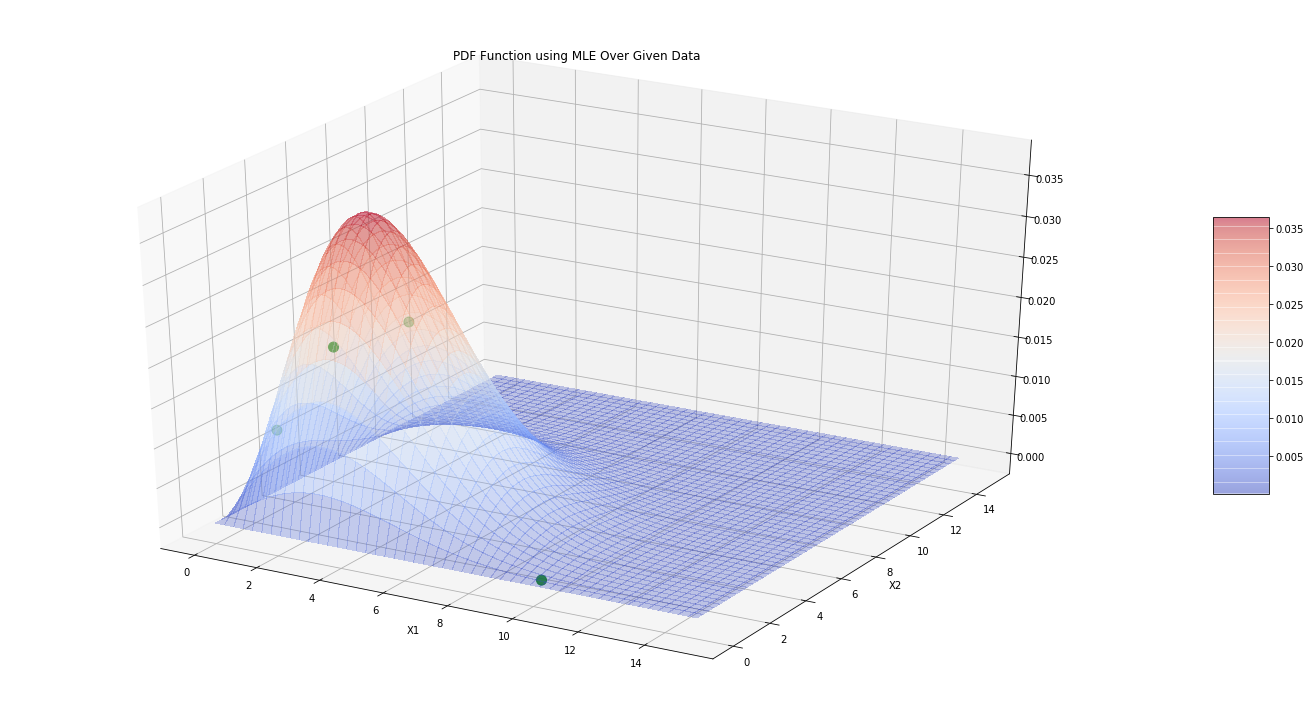

In [3]:
def mle_pdf(x,lam):
    p=4*lam[1]**2*x[0]*x[1]*np.exp(-lam[0]*(x[0]**2+x[1]**2))
    return p 

data_x=np.transpose(np.array([[0.5,2.5],[3.2,1.3],[2.72,5.84],[10.047,0.354]]))
#print(data_x.shape)

lam_hat=[8/np.sum(np.square(data_x)),8/np.sum(np.square(data_x))]
#print(lam_hat)
#print(data_x[:,1])
print(type(lam_hat))


mle_pdf(data_x,lam_hat)

#Mesh Grid Space
X1=np.arange(0,15,0.05)
X2=np.arange(0,15,0.05)

X1, X2 = np.meshgrid(X1,X2)
Z=mle_pdf([X1,X2],lam_hat)

#Plot 3D
fig=plt.figure(figsize=(20,10))
ax=fig.gca(projection='3d')

#Plot Surface
surf=ax.plot_surface(X1,X2,Z, cmap=cm.coolwarm,linewidth=0,antialiased=False,alpha=0.3,label='PDF')

#Add Points in Green
scatter=ax.scatter(data_x[0,:],data_x[1,:],mle_pdf(data_x,lam_hat),s=100,c='g',label='Given Data')

#Color Bar
fig.colorbar(surf,shrink=0.4,aspect=5)

#Add Titles and Labels
ax.set_title('PDF Function using MLE Over Given Data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.tight_layout()
plt.show()





    
    

(10000, 2)


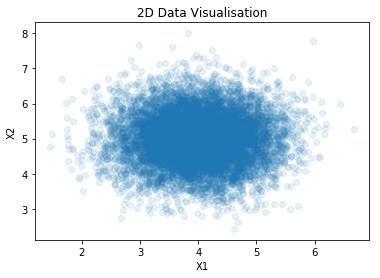

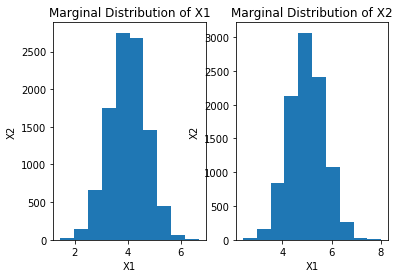

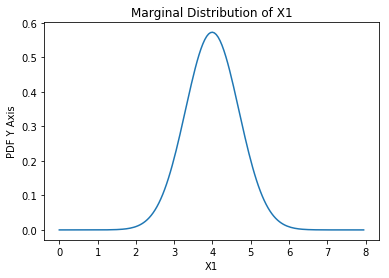

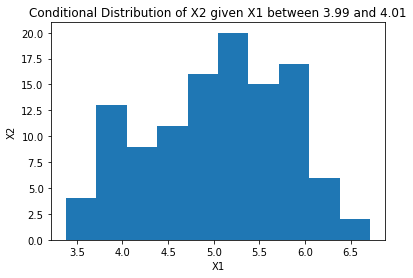

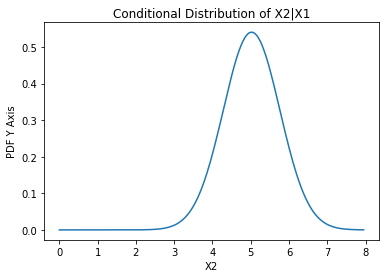

0.321294519126


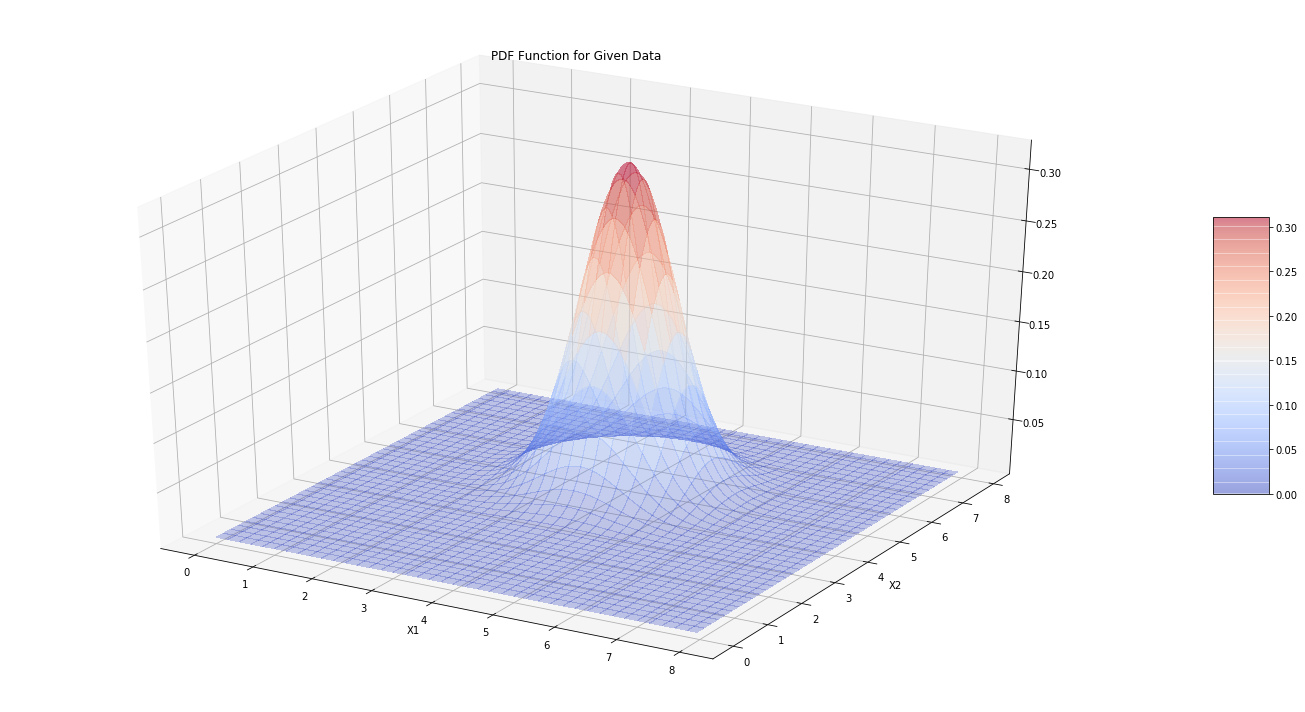

In [134]:
#Number Three: Part A
data=np.genfromtxt(r'Homework_1_Data.txt',delimiter=',')
print(data.shape)
from __future__ import division

#1
fig, ax=plt.subplots()
scatter=ax.scatter(data[:,0],data[:,1],alpha=0.1)
ax.set_title('2D Data Visualisation')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()


#2
fig, (ax1,ax2)=plt.subplots(1,2)
ax1.hist(data[:,0])
ax2.hist(data[:,1])
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax1.set_title('Marginal Distribution of X1')
ax2.set_title('Marginal Distribution of X2')

plt.show()

vitals=[np.mean(data[:,0]),np.var(data[:,0]),np.mean(data[:,1]),np.var(data[:,1])]
#print(vitals)

def normal_pdf(x,lam):
    p=(1/(np.sqrt(lam[1])*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-lam[0])/np.sqrt(lam[1]))**2)
    return p

vitals_x1=[np.mean(data[:,0]),np.var(data[:,0])]

normal_pdf(data[:,0],vitals_x1)


fig, ax1 =plt.subplots()
x=np.arange(0,8,0.05)
p=normal_pdf(x,vitals_x1)
ax1.plot(x,p)
ax1.set_xlabel('X1')
ax1.set_ylabel('PDF Y Axis')
ax1.set_title('Marginal Distribution of X1')
plt.show()



#x_2=data[:,1]
#print(x_2)
#conditional_x2=np.all
#conditional_data=.any(3.99<=data[:,0]<=4.01)
#print(conditional_data)

conditional_data=data[(data[:,0] >= 3.99) & (data[:,0] <= 4.01)]
#print(conditional_data)

conditional_x2=conditional_data[:,1]
#print(conditional_x2)

fig, ax1 =plt.subplots()
ax1.hist(conditional_x2)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Conditional Distribution of X2 given X1 between 3.99 and 4.01')
plt.show() #graph of the conditional distribution of X2 using the data

vitals_cond_x2=[np.mean(conditional_x2),np.var(conditional_x2)]
#print(vitals_cond_x2)

fig, ax1 =plt.subplots()
x=np.arange(0,8,0.05)
p=normal_pdf(x,vitals_cond_x2)
ax1.plot(x,p)
ax1.set_xlabel('X2')
ax1.set_ylabel('PDF Y Axis')
ax1.set_title('Conditional Distribution of X2|X1')
plt.show() #graph of the conditional distribution over general X2


peak_data=data[((data[:,0] >= 3.80) & (data[:,0] <= 4.20))&((data[:,1] >=4.80)&(data[:,1] <= 5.20))]
#print(peak_data,len(peak_data[:,0])/len(data[:,0]))

from __future__ import division

a=len(peak_data[:,0])
b=len(data[:,0])
#est_amplitude=(a/b)
#print(est_amplitude)

est_amplitude=1/(2*np.pi*np.sqrt(np.var(data[:,0])*np.var(data[:,1]))) #version two using other formula
print(est_amplitude)


def data_pdf(x,y,lam):
    p=lam[0]*np.exp(-(((x-lam[1])**2/(2*lam[2]**2))+((y-lam[3])**2/(2*lam[4]**2))))
    return p

lam_hat=[est_amplitude,np.mean(data[:,0]),np.sqrt(np.var(data[:,0])),np.mean(data[:,1]),np.sqrt(np.var(data[:,1]))]

data_pdf(data[:,0],data[:,1],lam_hat)


#Mesh Grid Space
X1=np.arange(0,8,0.05)
X2=np.arange(0,8,0.05)

X1, X2 = np.meshgrid(X1,X2)
Z=data_pdf(X1,X2,lam_hat)

#Plot 3D
fig=plt.figure(figsize=(20,10))
ax=fig.gca(projection='3d')

#Plot Surface
surf=ax.plot_surface(X1,X2,Z, cmap=cm.coolwarm,linewidth=0,antialiased=False,alpha=0.3,label='PDF')

#Color Bar
fig.colorbar(surf,shrink=0.4,aspect=5)

#Add Titles and Labels
ax.set_title('PDF Function for Given Data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.tight_layout()
plt.show()









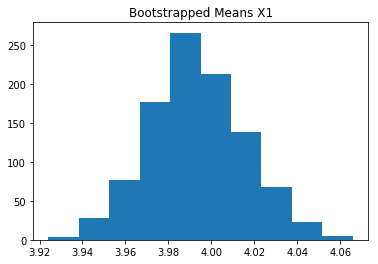

('Estimated mean:', 3.9931811455131965)
('Estimated mean Standard Error:', 0.022068482204670416)


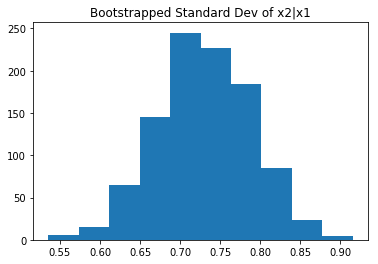

('Estimated sd:', 0.73042898605430961)
('Estimated sd Standard Error:', 0.058914321998616209)


In [163]:
#Number Three: Part B:
#We want mean of fx1 and sd of fx2|x1 x1 element of 3.99 to 4.01 and get standard error of estimate
# Function
#- define a function called get_bootstrap_sample(dataset) to generate each bootstrap sample
#- and then another function perform_bootstrap(dataset) to generate all the samples. 

def get_bootstrap_sample(dataset,n=None):
    if n is None:
        n=dataset.shape[0]
    bootstrap_sample=np.random.choice(dataset,n)
    return(bootstrap_sample)


def perform_bootstrap(dataset,n,nsamps,function):
    bootstrapped=np.zeros(nsamps)
    for i in range(nsamps):
        sample=get_bootstrap_sample(dataset,n)
        bootstrapped[i]=function(sample) ###here is issue
    return(bootstrapped)


#Running the function for mean of x1
bootstrapped_mean_x1=perform_bootstrap(data[:,0],1000,1000,np.mean) 

#Plotting what we get
fig, ax = plt.subplots()
ax.hist(bootstrapped_mean_x1)
ax.set_title('Bootstrapped Means X1')
plt.show()

#print(bootstrapped_mean_x1)

#Estimates
estimated_mean=np.mean(bootstrapped_mean_x1)
estimated_mean_se=np.sqrt(np.var(bootstrapped_mean_x1))

print('Estimated mean:', estimated_mean)
print('Estimated mean Standard Error:', estimated_mean_se)

#Running the function for standard dev of x2|x1
conditional_data=data[(data[:,0] >= 3.99) & (data[:,0] <= 4.01)]
#print(conditional_data)
conditional_x2=conditional_data[:,1]

#len(conditional_x2)

bootstrapped_var_cond_x2=perform_bootstrap(conditional_x2,50,1000,np.var)
bootstrapped_sd_cond_x2=np.sqrt(bootstrapped_var_cond_x2)

#Plotting what we get
fig, ax = plt.subplots()
ax.hist(bootstrapped_sd_cond_x2)
ax.set_title('Bootstrapped Standard Dev of x2|x1')
plt.show()

#Estimates
estimated_sd=np.mean(bootstrapped_sd_cond_x2)
estimated_sd_se=np.sqrt(np.var(bootstrapped_sd_cond_x2))

print('Estimated sd:', estimated_sd)
print('Estimated sd Standard Error:', estimated_sd_se)



In [ ]:
def bootstrap_fun(ntrials, data):
    maxes = np.zeros(ntrials)
    means = np.zeros(ntrials)
    variances = np.zeros(ntrials)
    for i in range(ntrials):
        sample = np.random.choice(data, 10)

        means[i] = np.mean(sample)
        variances[i] = np.var(sample)
        maxes[i] = np.amax(sample)
        
    return(means,variances,maxes)

# Run function
means, variances, maxes = bootstrap_fun(1000, height_data)

#plot the distribution
fig, ax = plt.subplots(1,3)
ax[0].hist(maxes)
ax[0].set_title('Max')
ax[1].hist(variances)
ax[1].set_title('Mean')
ax[2].hist(means)
ax[2].set_title('Variance')

plt.show()

In [166]:
#Number 4: 
#1
import pandas as pd
wine_data=pd.read_csv('wine_quality_missing.csv')

#print(wine_data.shape)

#print(wine_data['Ash'])

#wine_data.head

imputed_wine_data=wine_data.dropna() #this will remove all rows with NA value in them

#print(imputed_wine_data) 
#print('Number of Rows:',len(imputed_wine_data['Alcohol']))



In [ ]:
##Here I was trying with a for loop but it didn't work

headers=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',  'Proanthocyanins',  'Color intensity',   'Hue','OD280/OD315 of diluted wines',  'Proline',  'Class']
for w in headers[:]:
    new_wine_data_i=pd.DataFrame(wine_data.groupby('w').mean())
print(new_wine_data_14)


new_wine_data=wine_data.groupby('Ash').mean()

print(new_wine_data)

In [42]:
#Number Four:
#2
import pandas as pd
wine_data=pd.read_csv('wine_quality_missing.csv')
mean_wine_data=wine_data.fillna(wine_data.mean())
print(mean_wine_data)
print('Rows in mean_wine_data:',len(mean_wine_data['Alcohol']))





       Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0    14.230000    1.710000  2.430000          15.600000  127.00000   
1    13.200000    1.780000  2.140000          19.508861  100.00000   
2    13.160000    2.360000  2.670000          18.600000  101.00000   
3    14.370000    1.950000  2.500000          19.508861  113.00000   
4    13.240000    2.590000  2.870000          21.000000  118.00000   
5    14.200000    1.760000  2.450000          15.200000  112.00000   
6    14.390000    2.365963  2.450000          14.600000   96.00000   
7    14.060000    2.150000  2.610000          17.600000  121.00000   
8    14.830000    1.640000  2.170000          14.000000   97.00000   
9    13.860000    1.350000  2.270000          16.000000   98.00000   
10   14.100000    2.160000  2.300000          18.000000  105.00000   
11   14.120000    1.480000  2.320000          16.800000   95.00000   
12   13.750000    1.730000  2.410000          16.000000   89.00000   
13   14.750000    1.

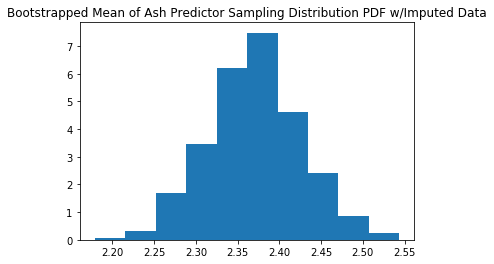

('Estimated mean on imputed data:', 2.3704443333333329)
('Estimated Standard Error of mean on imputed data:', 0.055870027853343114)


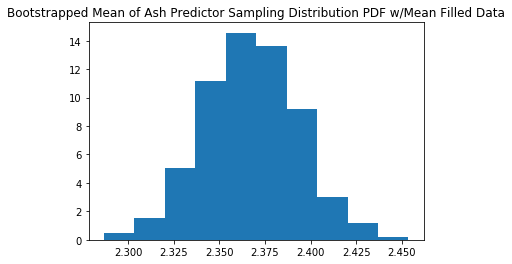

('Estimated mean on Mean-Filled data:', 2.3670989987179487)
('Estimated Standard Error of mean on Mean-Filled data:', 0.02588506624810662)


In [169]:
#Number Four
#3
#Running Bootstrap on Imputed Data to get Sampling Distribution of Mean
#len(imputed_wine_data)

bootstrapped_mean_imputed=perform_bootstrap(imputed_wine_data['Ash'],30,1000,np.mean)

#Plotting what we get
fig, ax = plt.subplots()
ax.hist(bootstrapped_mean_imputed,normed=True)
ax.set_title('Bootstrapped Mean of Ash Predictor Sampling Distribution PDF w/Imputed Data')
plt.show()

#Estimates
estimated_mean=np.mean(bootstrapped_mean_imputed)
estimated_mean_se=np.sqrt(np.var(bootstrapped_mean_imputed))

print('Estimated mean on imputed data:', estimated_mean)
print('Estimated Standard Error of mean on imputed data:', estimated_mean_se)

#Running Bootstrap on Imputed Data to get Sampling Distribution of Mean
#len(imputed_wine_data)

bootstrapped_mean_mfed=perform_bootstrap(mean_wine_data['Ash'],100,1000,np.mean)

#Plotting what we get
fig, ax = plt.subplots()
ax.hist(bootstrapped_mean_mfed,normed=True)
ax.set_title('Bootstrapped Mean of Ash Predictor Sampling Distribution PDF w/Mean Filled Data')
plt.show()

#Estimates
estimated_mean=np.mean(bootstrapped_mean_mfed)
estimated_mean_se=np.sqrt(np.var(bootstrapped_mean_mfed))

print('Estimated mean on Mean-Filled data:', estimated_mean)
print('Estimated Standard Error of mean on Mean-Filled data:', estimated_mean_se)

#Reason why Mean-Filled Data has lower SE than Imputed Data
print('Mean-Filled Data has more observations which leads to a smaller estimate of standard error')

